In [ ]:
import requests
import matplotlib.pyplot as plt
from urllib.parse import quote

In [ ]:
journal_types = (
    ('Medical journal', 'Q16024164'),
    ('Academic journal', 'Q737498'),
    ('Open access journal', 'Q773668'),
    ('Scientific journal', 'Q5633421')
)

In [ ]:
wikidata_endpoint = 'https://query.wikidata.org/sparql'

In [ ]:
def do_query(query):
    url = '%s?query=%s' % (wikidata_endpoint, quote(query))
    return requests.get(url, headers={'Accept': 'application/sparql-results+json'}).json()

In [71]:
def journals_by_category():
    print('\nJournals by category:')
    labels = []
    counts = []
    for cat, qid in journal_types:
        labels.append(cat)
        query = '''
            SELECT (COUNT(?journal) AS ?count) WHERE {
              ?journal wdt:P31 wd:%s . # %s
            }
        ''' % (qid, cat)
        count = int(do_query(query)['results']['bindings'][0]['count']['value'])
        counts.append(count)
        print('  %s %s' % (cat, count))
    plt.pie(counts, labels=labels)
    plt.axis('equal')
    plt.show()

    plt.barh(labels, counts, align='center', alpha=0.5)
    plt.title('Journals by category')
    plt.show()


In [72]:
def articles_by_category():
    print('\Scholarly articles by category:')
    labels = []
    counts = []
    for cat, qid in journal_types:
        labels.append(cat)
        query = '''
            SELECT (COUNT(?item) AS ?count) WHERE {
              ?journal wdt:P31 wd:%s . # %s
              ?item wdt:P31 wd:Q13442814 ;
                    wdt:P1433 ?journal .
            }
        ''' % (qid, cat)
        count = int(do_query(query)['results']['bindings'][0]['count']['value'])
        counts.append(count)
        print('  %s %s' % (cat, count))
    plt.pie(counts, labels=labels)
    plt.axis('equal')
    plt.show()

    plt.barh(labels, counts, align='center', alpha=0.5)
    plt.title('Scholarly articles by category')
    plt.show()



Journals by category:
  Medical journal 138
  Academic journal 11894
  Open access journal 587
  Scientific journal 45304


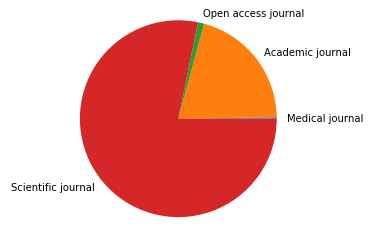

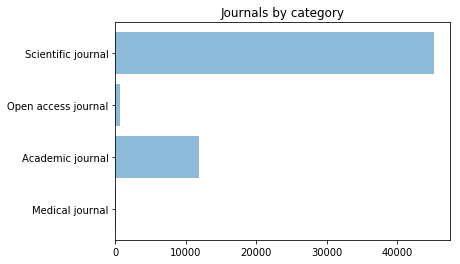

In [73]:
journals_by_category()